In [ ]:
#!pip install pytorch-lightning
import pytorch_lightning as pl 
from torch.utils.data import dataloader
# Importación de librerías
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
import torch
from torch import utils
# from torch import utils
from sklearn.metrics import mean_squared_error, r2_score
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
from tensorflow.keras.utils import plot_model
#
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [ ]:
# # Para conectar con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Parte 1: Lectura de datos

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Introducción a la inteligencia artificial/Tarea 3/cancer.csv")
del data['Unnamed: 32']
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [ ]:
x = data.iloc[:,2:] # extrae como arreglos numpy
y = data.iloc[:,1]

In [ ]:
# Recodifica la variable objetivo
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [ ]:
y

In [ ]:
# Convertimos las variables a tensores
X = torch.tensor(x.values, dtype=torch.float32)
Y = torch.tensor(y, dtype=torch.float32)

In [ ]:
# Vamos a normalizar los datos
def Normalize(data):
    data_mean = torch.mean(data, dim=0)
    data_max = torch.max(data, dim=0)[0]
    data_min = torch.min(data, dim=0)[0]
    data = (data-data_mean)/(data_max-data_min)
    return data

In [ ]:
X_normalized = Normalize(X)

In [ ]:
from random import sample

In [ ]:
np.random.seed(1232)
lista = range(len(data))
muestra = sample(lista, int(len(data)*0.8))
#muestra
#test_data = dataset.iloc[dataset.index.isin(muestra)]
len(muestra)

455

In [ ]:
testing = []
for i in range(len(data)):
  if data.index[i] not in muestra:
    testing.append(i)

In [ ]:
len(testing) + len(muestra) # good!!

569

In [ ]:
X_train = X_normalized[muestra]
Y_train = Y[muestra]
X_test = X_normalized[testing]
Y_test = Y[testing]

## Parte 2: Creación del modelo

In [ ]:
class Logistic_Reg_model(pl.LightningModule):
 def __init__(self,no_input_features):
   super(Logistic_Reg_model,self).__init__()
   self.layer1=torch.nn.Linear(no_input_features,16)
   self.layer2=torch.nn.Linear(16,16)
   self.layer3=torch.nn.Linear(16,1)
   self.dropout = torch.nn.Dropout(0.1)
 def forward(self,x):
   y_predicted=self.layer1(x)
   y_predicted = self.dropout(y_predicted)
   y_predicted = self.layer2(y_predicted)
   y_predicted = self.dropout(y_predicted)
   y_predicted=torch.sigmoid(self.layer3(y_predicted))
   return y_predicted

In [ ]:
model=Logistic_Reg_model(30)

In [ ]:
criterion=torch.nn.BCELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [ ]:
number_of_epochs=150
for epoch in range(number_of_epochs):
 y_prediction=model(X_train)
 loss=criterion(y_prediction.reshape(-1),Y_train)
 loss.backward()
 optimizer.step()
 optimizer.zero_grad()
 if (epoch+1)%10 == 0:
   print('epoch:', epoch+1,',loss=',loss.item())

epoch: 10 ,loss= 0.39548176527023315
epoch: 20 ,loss= 0.12683090567588806
epoch: 30 ,loss= 0.07312101125717163
epoch: 40 ,loss= 0.06726587563753128
epoch: 50 ,loss= 0.06387179344892502
epoch: 60 ,loss= 0.0546693280339241
epoch: 70 ,loss= 0.05458204820752144
epoch: 80 ,loss= 0.056758902966976166
epoch: 90 ,loss= 0.051374323666095734
epoch: 100 ,loss= 0.0509248785674572
epoch: 110 ,loss= 0.04858255013823509
epoch: 120 ,loss= 0.052579380571842194
epoch: 130 ,loss= 0.050077732652425766
epoch: 140 ,loss= 0.043022144585847855
epoch: 150 ,loss= 0.0401252843439579


In [ ]:
# Predicting the Test set results
y_pred = model(X_test)
#y_pred = (y_pred > 0.5)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <=0.5] = 0

In [ ]:
cm = confusion_matrix(Y_test.detach().numpy(), y_pred.detach().numpy())
print(cm)

[[73  1]
 [ 3 37]]


In [ ]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/Y_test.shape[0]).round(3)*100))

Our accuracy is 96.5%


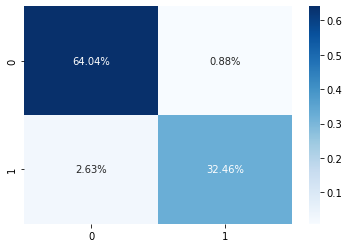

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm/np.sum(cm), annot=True,
            fmt='.2%', cmap='Blues')
plt.show()